# **Practical 11** -

### **Problem Statement :**
* CNN implementation using tensorflow

In [ ]:
# Installing the required Libraries
!pip install tensorflow

In [ ]:
# Importing the Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

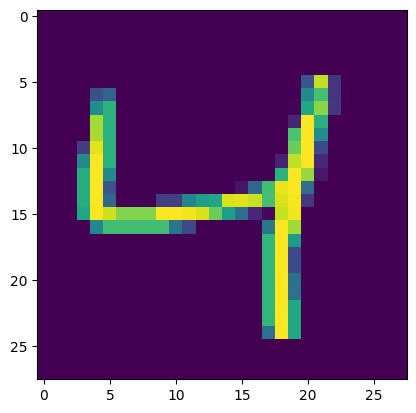

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
# First we have to change the values of the Pixel Array in the range of 0 to 1 i.e. we need to
# scale them -> coz if the values are in same range then the calculation of weigts will be faster
# i.e. convergence will be faster

# Dividing every value by the max pixel value i.e 255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

Epoch 1/5
1875/1875 [==============================] - 53s 27ms/step - loss: 0.1521 - accuracy: 0.9534 - val_loss: 0.0606 - val_accuracy: 0.9799
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.0374 - val_accuracy: 0.9874
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0334 - val_accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0344 - val_accuracy: 0.9888
Epoch 5/5
313/313 [==============================] - 3s 11ms/step
Predictions -  tf.Tensor([7 2 1 ... 4 5 6], shape=(10000,), dtype=int64)


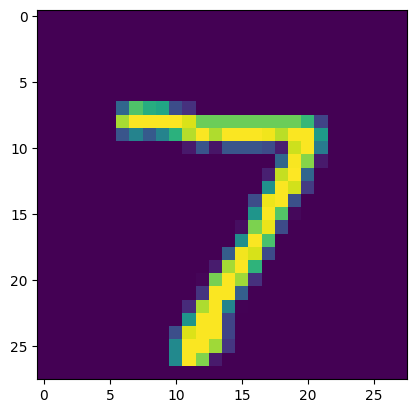

In [ ]:
# Create and compile the model
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)

print("Predictions - ",y_pred)
plt.imshow(X_test[0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9902
Precision: 0.9903025004395524
Recall: 0.9900085504038303
F1 Score: 0.9901354498610238
